## I. 데이터 준비

In [66]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime as dt

### 1.1 데이터 확인

In [67]:
train = pd.read_csv('train.csv')
train.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,4.0,Married,3.0,0,4,0,1.0,Executive,21274.0,1
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,3.0,Divorced,2.0,0,3,1,0.0,Manager,19907.0,0


In [68]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

- id : 샘플 아이디  
- Age : 나이  
- TypeofContact : 고객의 제품 인지 방법 (회사의 홍보 or 스스로 검색)  
- CityTier : 주거 중인 도시의 등급. (인구, 시설, 생활 수준 기준) (1등급 > 2등급 > 3등급)   
- DurationOfPitch : 영업 사원이 고객에게 제공하는 프레젠테이션 기간  
- Occupation : 직업  
- Gender : 성별  
- NumberOfPersonVisiting : 고객과 함께 여행을 계획 중인 총 인원  
- NumberOfFollowups : 영업 사원의 프레젠테이션 후 이루어진 후속 조치 수  
- ProductPitched : 영업 사원이 제시한 상품  
- PreferredPropertyStar : 선호 호텔 숙박업소 등급  
- MaritalStatus : 결혼여부  
- NumberOfTrips : 평균 연간 여행 횟수  
- Passport : 여권 보유 여부 (0: 없음, 1: 있음)  
- PitchSatisfactionScore : 영업 사원의 프레젠테이션 만족도  
- OwnCar : 자동차 보유 여부 (0: 없음, 1: 있음)  
- NumberOfChildrenVisiting : 함께 여행을 계획 중인 5세 미만의 어린이 수  
- Designation : (직업의) 직급  
- MonthlyIncome : 월 급여  
- ProdTaken : 여행 패키지 신청 여부 (0: 신청 안 함, 1: 신청함)  

### 1.2 describe() 이용해 데이터 통계량 요약하기

In [69]:
train.describe()

,id,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome,ProdTaken
count,1955.000000,1861.000000,1955.000000,1853.000000,1955.000000,1942.000000,1945.000000,1898.000000,1955.000000,1955.000000,1955.000000,1928.000000,1855.000000,1955.000000
mean,978.000000,37.462117,1.641432,15.524015,2.922762,3.718332,3.568638,3.255532,0.291049,3.067519,0.619437,1.213174,23624.108895,0.195908
std,564.504207,9.189948,0.908744,8.150057,0.712276,1.004095,0.793196,1.814698,0.454362,1.372915,0.485649,0.859450,5640.482258,0.397000
min,1.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000,0.000000
25%,489.500000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20390.000000,0.000000
50%,978.000000,36.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22295.000000,0.000000
75%,1466.500000,43.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25558.000000,0.000000
max,1955.000000,61.000000,3.000000,36.000000,5.000000,6.000000,5.000000,19.000000,1.000000,5.000000,1.000000,3.000000,98678.000000,1.000000


## II. 결측치 확인 및 처리

In [70]:
a = train.isnull().sum()


**총 8개의 컬럼에 결측치 존재.**
- Age
- TypeofContact 
- DurationOfPitch
- NumberOfFollowups                     
- PreferredPropertyStar     
- NumberOfTrips               
- NumberOfChildrenVisiting    
- MonthlyIncome        


### 1.1 데이터 자세히 들여다보기 위해 unique() 사용

In [71]:
print(train['Age'].unique())
print(train['TypeofContact'].unique())
print(train['DurationOfPitch'].unique())
print(train['NumberOfFollowups'].unique())
print(train['PreferredPropertyStar'].unique())
print(train['NumberOfTrips'].unique())
print(train['NumberOfChildrenVisiting'].unique())
print(train['MonthlyIncome'].unique())

# 'Fe male' 전처리 해주기
print(train['Gender'].unique())
# 'Single' -  'Unmarried' 의미가 모호하므로 'Single'로 merge 해주기
print(train['MaritalStatus'].unique())

[28. 34. 45. 29. 42. 32. 43. 36. 35. 31. 49. nan 52. 33. 22. 50. 23. 41.
 37. 40. 56. 54. 39. 20. 46. 27. 38. 25. 26. 24. 30. 21. 51. 47. 55. 44.
 53. 48. 18. 57. 60. 59. 19. 58. 61.]
['Company Invited' 'Self Enquiry' nan]
[10. nan  7.  6. 29.  8. 20. 14.  9. 16. 15. 23. 21. 11. 25. 34. 17. 13.
 28. 12. 22. 30. 24. 27. 31. 35. 32. 33. 36. 19. 26. 18.  5.]
[ 4.  3.  5.  1.  6.  2. nan]
[ 3.  4.  5. nan]
[ 3.  1.  2.  7.  4.  6.  5.  8. nan 19.]
[ 1.  0.  2.  3. nan]
[20384. 19599.    nan ... 31595. 22218. 17853.]
['Male' 'Female' 'Fe Male']
['Married' 'Single' 'Divorced' 'Unmarried']


In [72]:
train['Gender'].replace({'Fe Male': 'Female'}, inplace=True)
train['MaritalStatus'].replace({'Unmarried': 'Single'}, inplace=True)

In [73]:
print(train['Gender'].unique())

['Male' 'Female']


In [74]:
print(train['MaritalStatus'].unique())

['Married' 'Single' 'Divorced']


### 1.2 Feature 시각화

<AxesSubplot:xlabel='NumberOfTrips', ylabel='Density'>

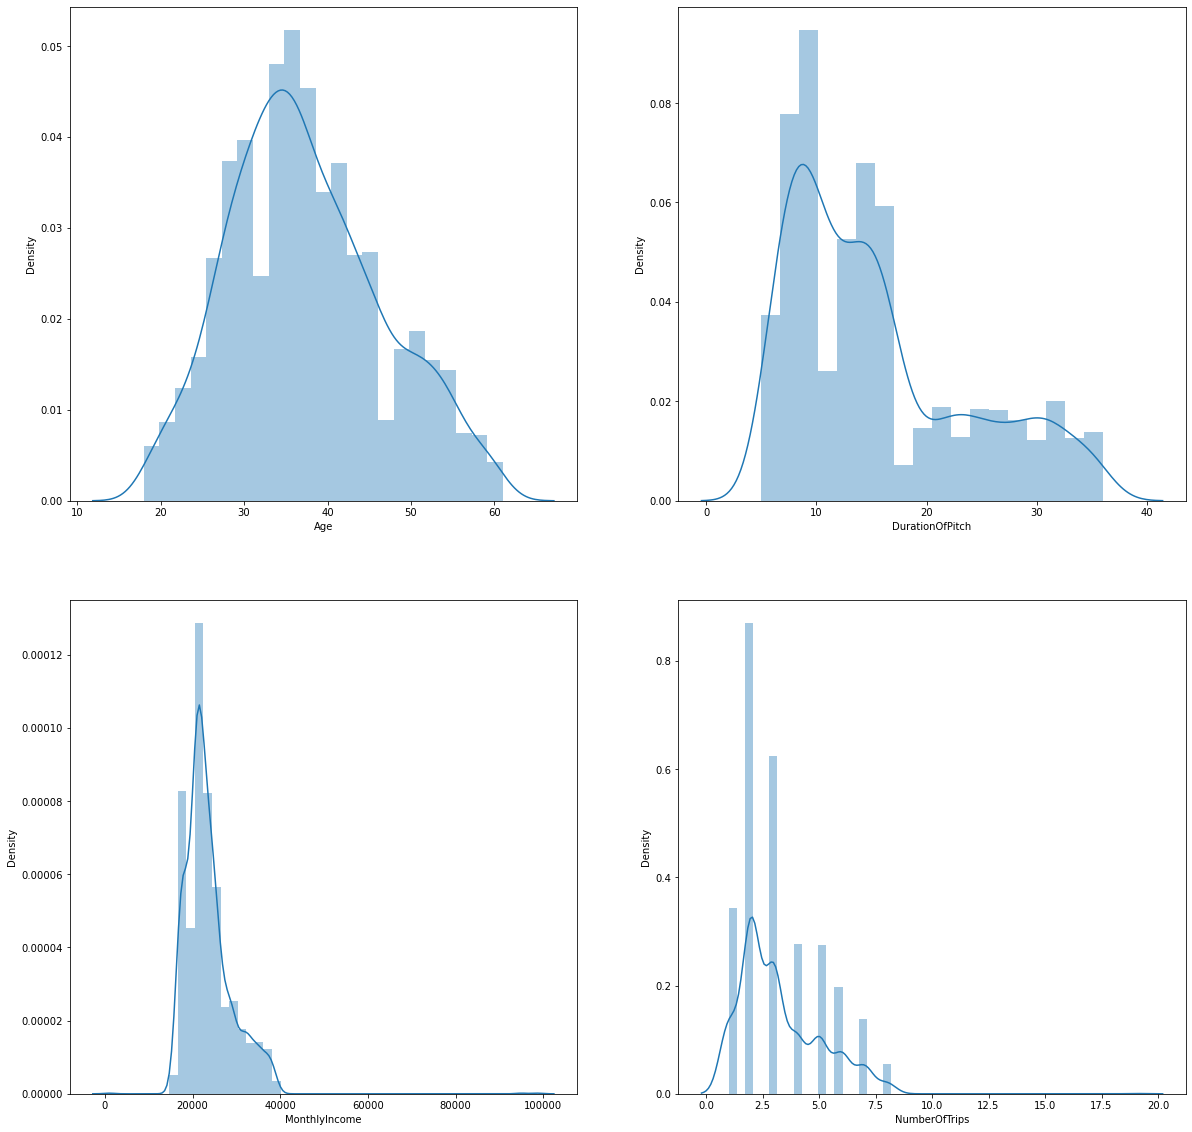

In [75]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,20))
sns.distplot(train['Age'], ax=ax[0,0])
sns.distplot(train['DurationOfPitch'], ax=ax[0,1])
sns.distplot(train['MonthlyIncome'], ax=ax[1,0])
sns.distplot(train['NumberOfTrips'], ax=ax[1,1])

<AxesSubplot:xlabel='NumberOfTrips'>

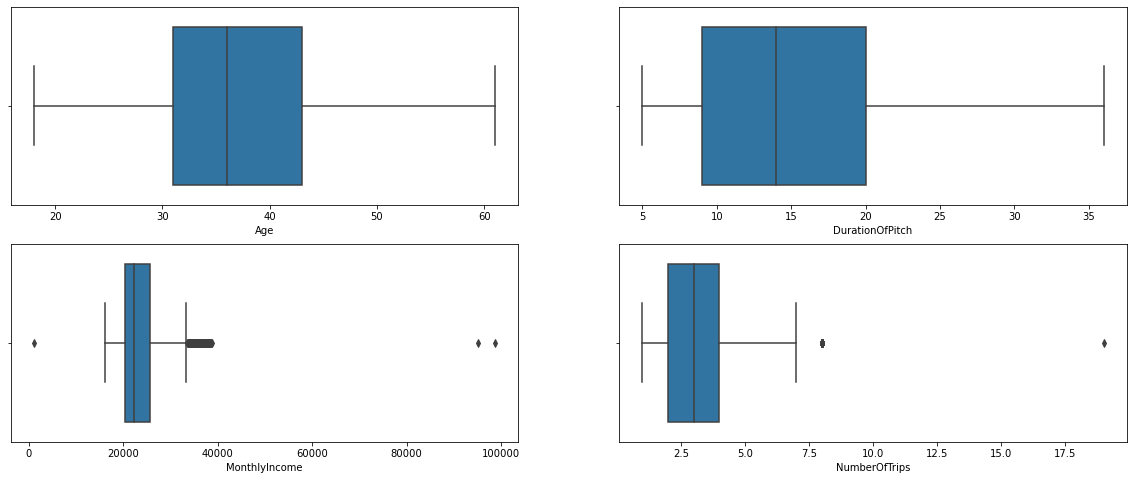

In [76]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(20,8))
sns.boxplot(x=train['Age'], ax=ax[0,0])
sns.boxplot(x=train['DurationOfPitch'], ax=ax[0,1])
sns.boxplot(x=train['MonthlyIncome'], ax=ax[1,0])
sns.boxplot(x=train['NumberOfTrips'], ax=ax[1,1])

- Age는 평균값으로 대체 
- TypeofContact(고객의 제품 인지 방법) 컬럼은 결측치를 채우기 모호하므로 unknown으로 대체
- DurationOfPitch는 데이터의 편차가 크므로 중앙값으로 대체
- NumberOfFollowups 평균값으로 대체
- PreferredPropertyStar 평균값으로 대체
- NumberOfTrips는 이상치가 존재해 중앙값으로 대체 후 이상치 제거
- NumberOfChildrenVisiting 평균값으로 대체 
- MonthlyIncome는 중앙값으로 대체

## III. 결측값, 이상치 처리

In [77]:
train['Age']=train['Age'].fillna(train['Age'].mean()).astype('int64')
train['DurationOfPitch']=train['DurationOfPitch'].fillna(train['DurationOfPitch'].median()).astype('int64')
train['NumberOfFollowups']=train['NumberOfFollowups'].fillna(train['NumberOfFollowups'].mean()).astype('int64')
train['PreferredPropertyStar']=train['PreferredPropertyStar'].fillna(train['PreferredPropertyStar'].mean())
train['NumberOfTrips']=train['NumberOfTrips'].fillna(train['NumberOfTrips'].median())
train['NumberOfChildrenVisiting']=train['NumberOfChildrenVisiting'].fillna(train['NumberOfChildrenVisiting'].mean()).astype('int64')
train['MonthlyIncome']=train['MonthlyIncome'].fillna(train['MonthlyIncome'].median())
# "Unknown"으로 채우는 경우
train['TypeofContact'] = train['TypeofContact'].fillna("Unknown")

In [78]:
train.drop(train[train.NumberOfTrips > 15 ].index, inplace=True)

## IIII. 데이터 시각화를 위해 데이터 내보내기

In [79]:
train.to_csv('./train_0.1.csv', index=False)